## Stastical Learning-Worked Examples

The whole Linear Regression is explained with two datasets:

 1. Car Price Prediction

 2. Sales Prediction




##DATASET_1

**Problem Statement**

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

The company wants to know:
Which variables are significant in predicting the price of a car.
How well those variables describe the price of a car.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [26]:
# importing all the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import xticks

 I pulled the kaggle dataset data directly from Kaggle with my API tokens for our note book. For that we need to install the below commands.

In [2]:
!pip install eli5
!pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=14401d0700d2224fa265e6484348c9a60b6cd1f59c5c617a10776555bc73fdde
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"divyamyneni123","key":"2546107efd3aa943c0b742f6638a9937"}'}

Downloaded the data directly from the Kaggle.Check the below link for the reference to work on your dataset.

https://www.kaggle.com/general/74235

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
# dowloading the data set from the kaggle and reading it
! kaggle datasets list -s car-price-prediction


ref                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
deepcontractor/car-price-prediction-challenge   Car Price Prediction Challenge                   429KB  2022-07-06 11:38:32           4894        112  0.9411765        
adhurimquku/ford-car-price-prediction           Ford Car Price Prediction                        174KB  2022-04-11 10:15:03           4122         60  0.9411765        
hellbuoy/car-price-prediction                   Car Price Prediction Multiple Linear Regression   18KB  2019-10-15 16:45:27          44834        457  0.7058824        
milanvaddoriya/old-car-price-prediction         Old car price prediction                         105KB  2022-12-24 15:38:56           1296         43  1.0 

Searching my dataset from the above all the kaggle datasets for our notebook to perform linear regression

In [9]:
# searching for my dataset from the list below
! kaggle datasets download -d ashydv/car-price-prediction

  0% 0.00/6.07k [00:00<?, ?B/s]
100% 6.07k/6.07k [00:00<00:00, 3.06MB/s]


In [10]:
!unzip car-price-prediction.zip

Archive:  car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  


##Reading and Understanding the Data

In [12]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [13]:
df.shape
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


The data has been read and has been shaped accordingly and head method shows the first 5 rows of the data set.

##Data Inspection

In [14]:
df.shape

(205, 26)

This will display a summary of the dataframe's information, including the number of rows and columns, the column names and data types, and the number of non-null values in each column.



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

This will generate summary statistics for each numerical column in the dataframe, including the count, mean, standard deviation, minimum, and maximum values, as well as the quartiles.

In [15]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [17]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

###Data Cleaning

This code is checking for null values in the advertising dataframe and printing the percentage of null values for each column. The .isnull() method returns a Boolean dataframe with True values for null or missing values and False values otherwise. The .sum() method then calculates the total number of null values for each column, and multiplying by 100/advertising.shape[0] calculates the percentage of null values for each column.



In [18]:
#checking duplicates
sum(df.duplicated(subset = 'car_ID')) == 0
# No duplicate values


True

In [19]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

##Exploratory Data Analysis ( EDA )

**Price : Target Variable**

In [20]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

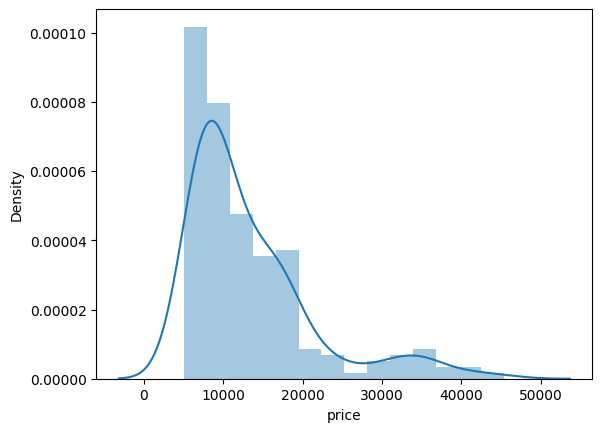

In [21]:
sns.distplot(df['price'])

Inference

Mean and median of price are significantly different.

Large standard deviation indicates that there is considerable variance in the prices of the automobiles.

Price values are right-skewed, most cars are priced at the lower end (9000) of the price range.
car_ID : Unique ID for each observation

**Symboling** : Its assigned insurance risk rating

            A value of +3 indicates that the auto is risky,

            -3 that it is probably pretty safe.(Categorical)
Let's see the count of automobile in each category and percent share of each category.

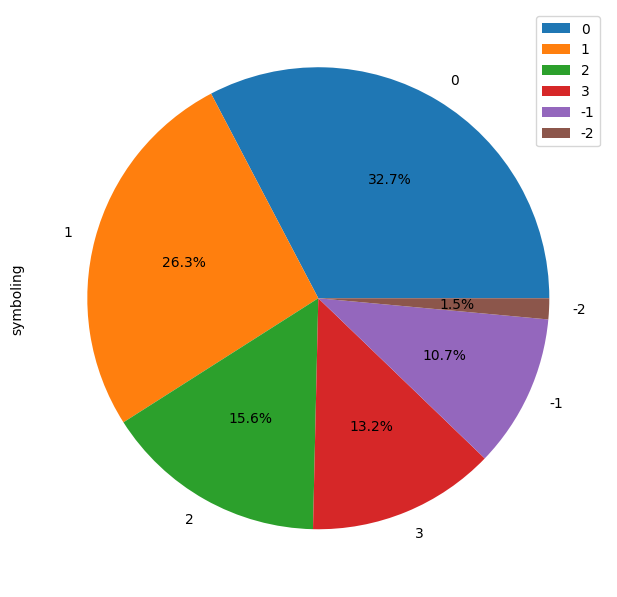

<Figure size 640x480 with 0 Axes>

In [24]:
df_sym = pd.DataFrame(df['symboling'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

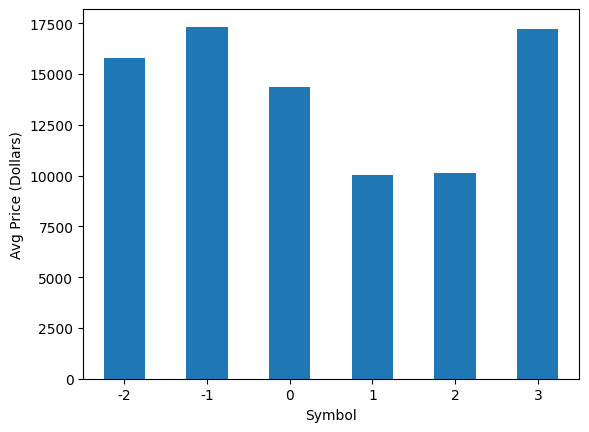

In [27]:
plt1 = df[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

In [28]:
df.CarName.values[0:10]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)'], dtype=object)

In [29]:
df['brand'] = df.CarName.str.split(' ').str.get(0).str.upper()

In [30]:
len(set(df.brand.values))

27

In [33]:
df.brand.describe()

count        205
unique        27
top       TOYOTA
freq          31
Name: brand, dtype: object

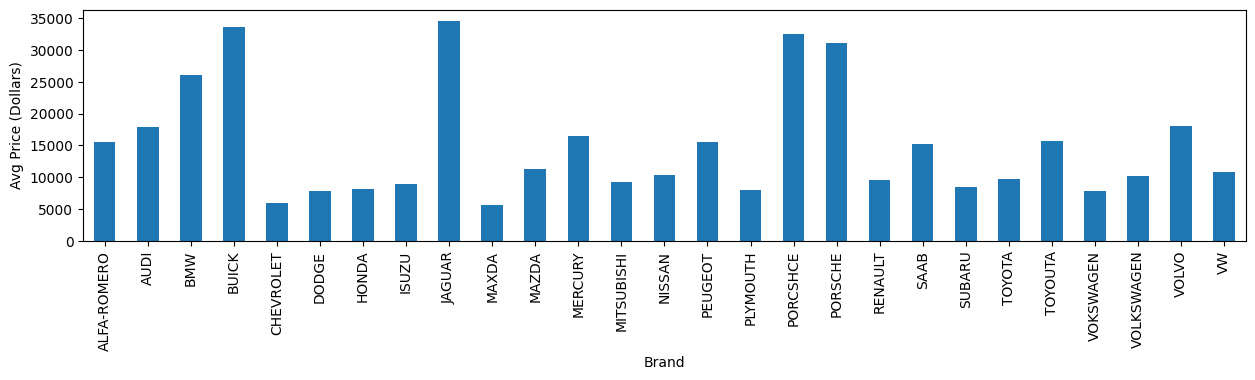

In [34]:
df_comp_avg_price = df[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'brand', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 90)
plt.show()

In [35]:
df = df.merge(df_comp_avg_price, on = 'brand')

In [36]:
df['brand_category'] = df['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

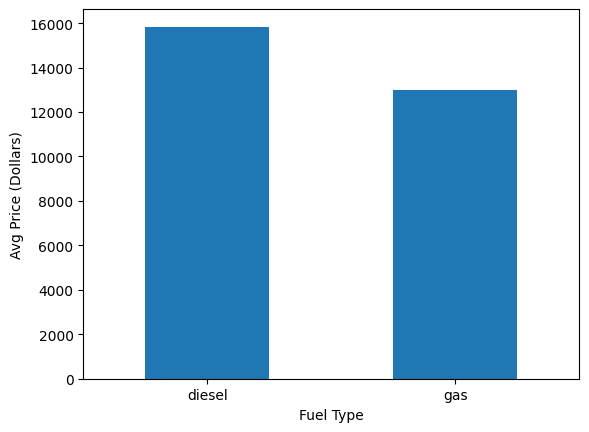

In [37]:
df_fuel_avg_price = df[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

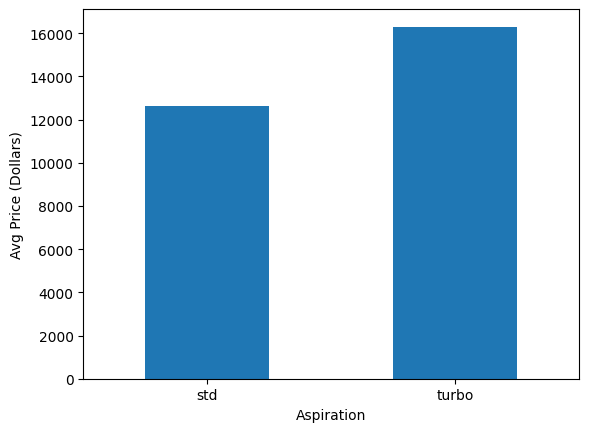

In [38]:
df_aspir_avg_price = df[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = df_aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

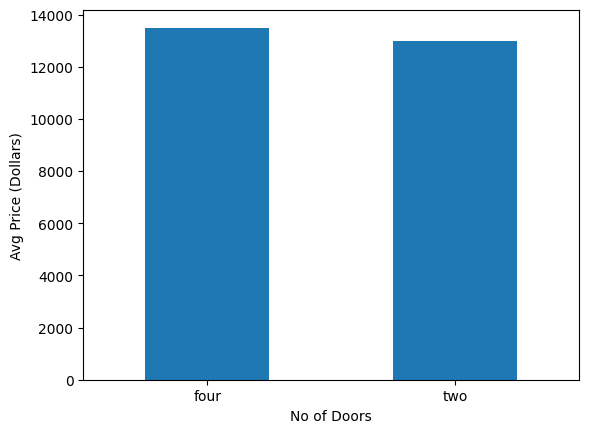

In [39]:
df_door_avg_price = df[['doornumber','price']].groupby("doornumber", as_index = False).mean().rename(columns={'price':'door_avg_price'})
plt1 = df_door_avg_price.plot(x = 'doornumber', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("No of Doors")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

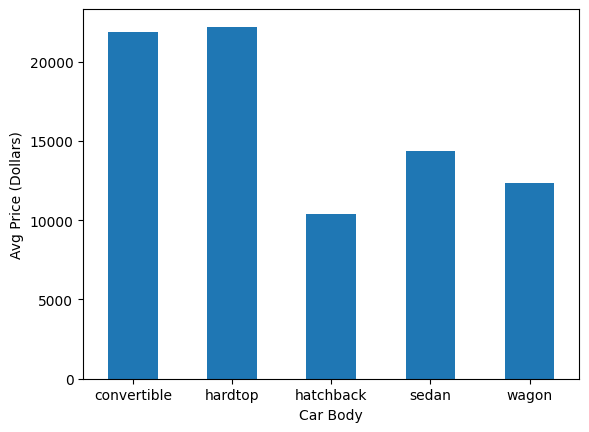

In [40]:
df_body_avg_price = df[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = df_body_avg_price.plot(x = 'carbody', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show() 

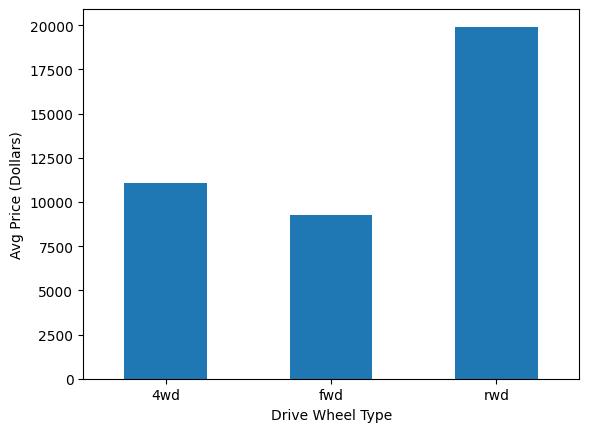

In [41]:
df_drivewheel_avg_price = df[['drivewheel','price']].groupby("drivewheel", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = df_drivewheel_avg_price.plot(x = 'drivewheel', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

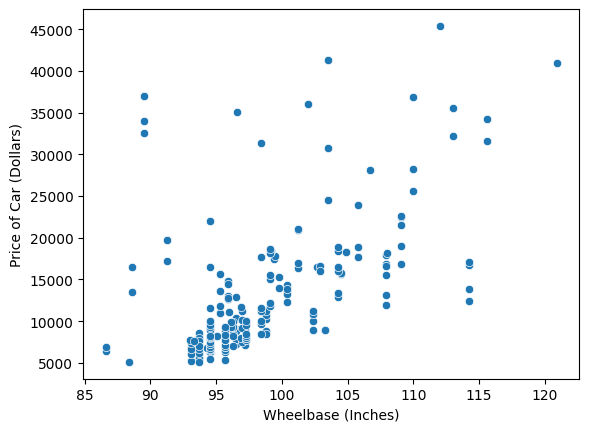

In [42]:
plt1 = sns.scatterplot(x = 'wheelbase', y = 'price', data = df)
plt1.set_xlabel('Wheelbase (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

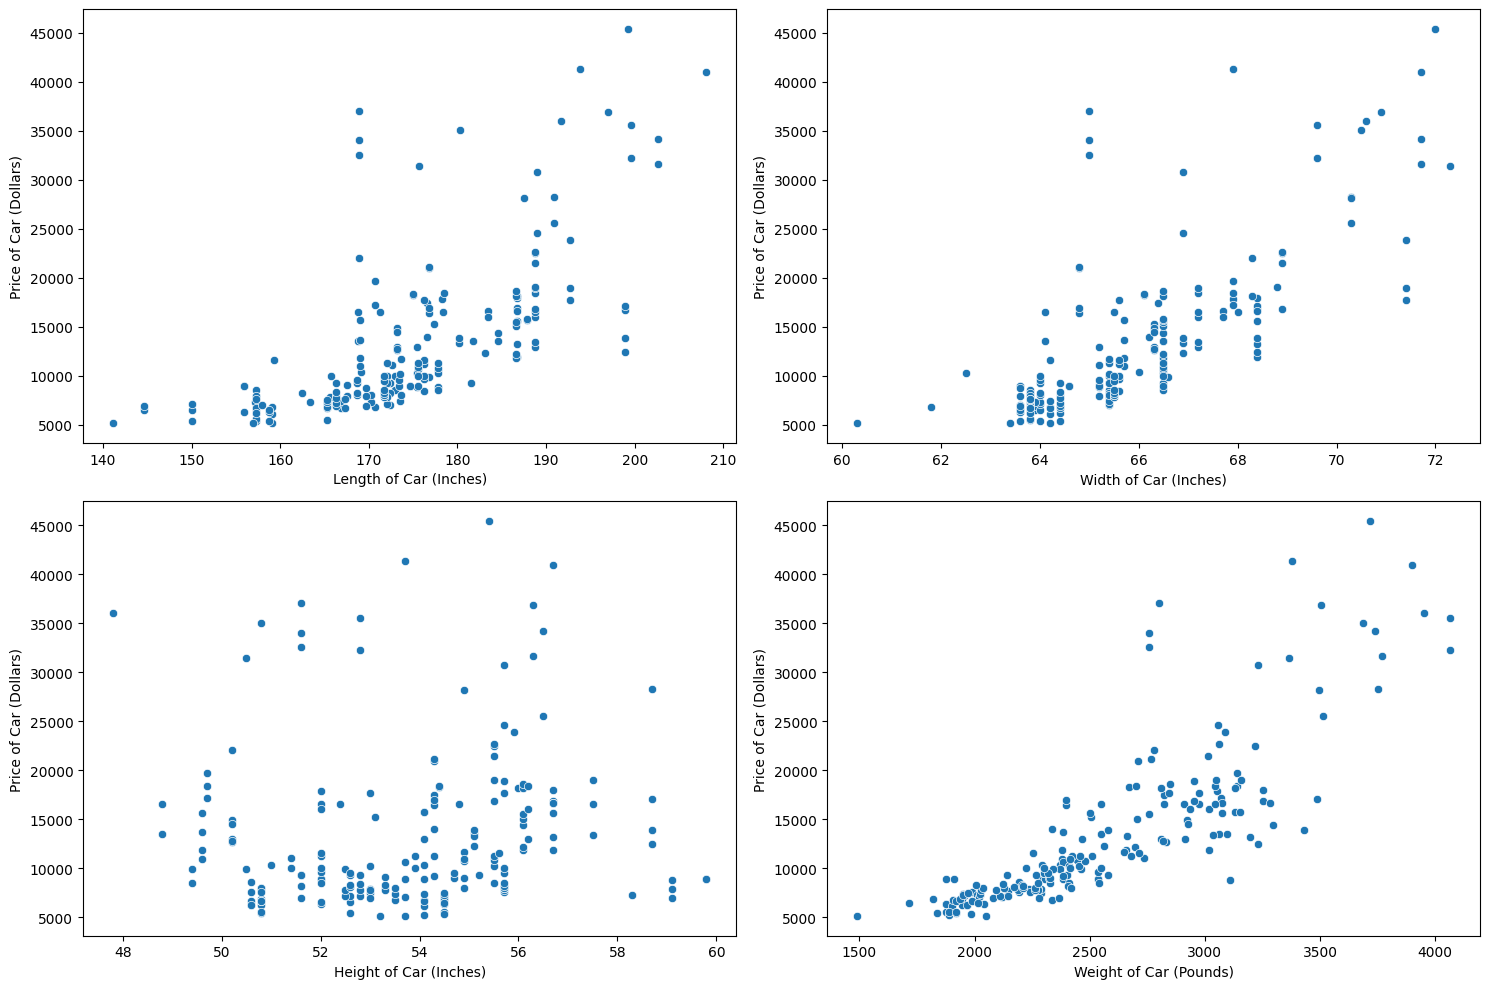

In [43]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'curbweight', y = 'price', data = df, ax = axs[1,1])
plt3.set_xlabel('Weight of Car (Pounds)')
plt3.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()

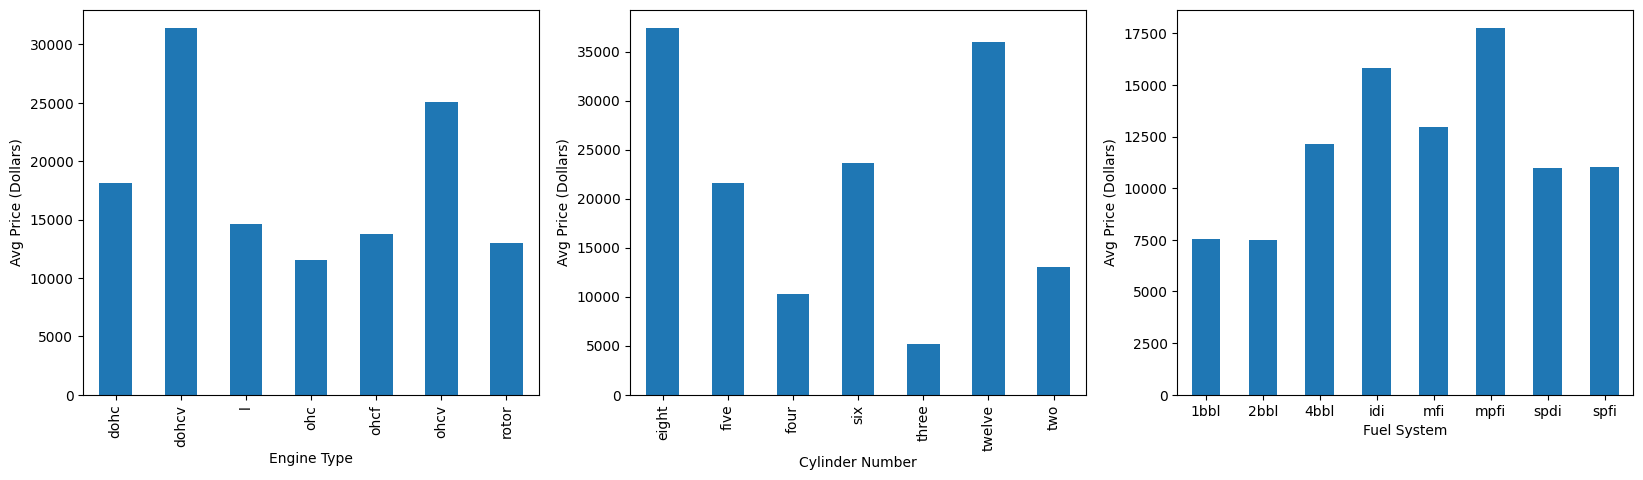

In [44]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
#
df_engine_avg_price = df[['enginetype','price']].groupby("enginetype", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = df_engine_avg_price.plot(x = 'enginetype', kind='bar', sort_columns = True, legend = False, ax = axs[0])
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#
df_cylindernumber_avg_price = df[['cylindernumber','price']].groupby("cylindernumber", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = df_cylindernumber_avg_price.plot(x = 'cylindernumber', kind='bar', sort_columns = True,legend = False, ax = axs[1])
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#
df_fuelsystem_avg_price = df[['fuelsystem','price']].groupby("fuelsystem", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = df_fuelsystem_avg_price.plot(x = 'fuelsystem', kind='bar', sort_columns = True,legend = False, ax = axs[2])
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

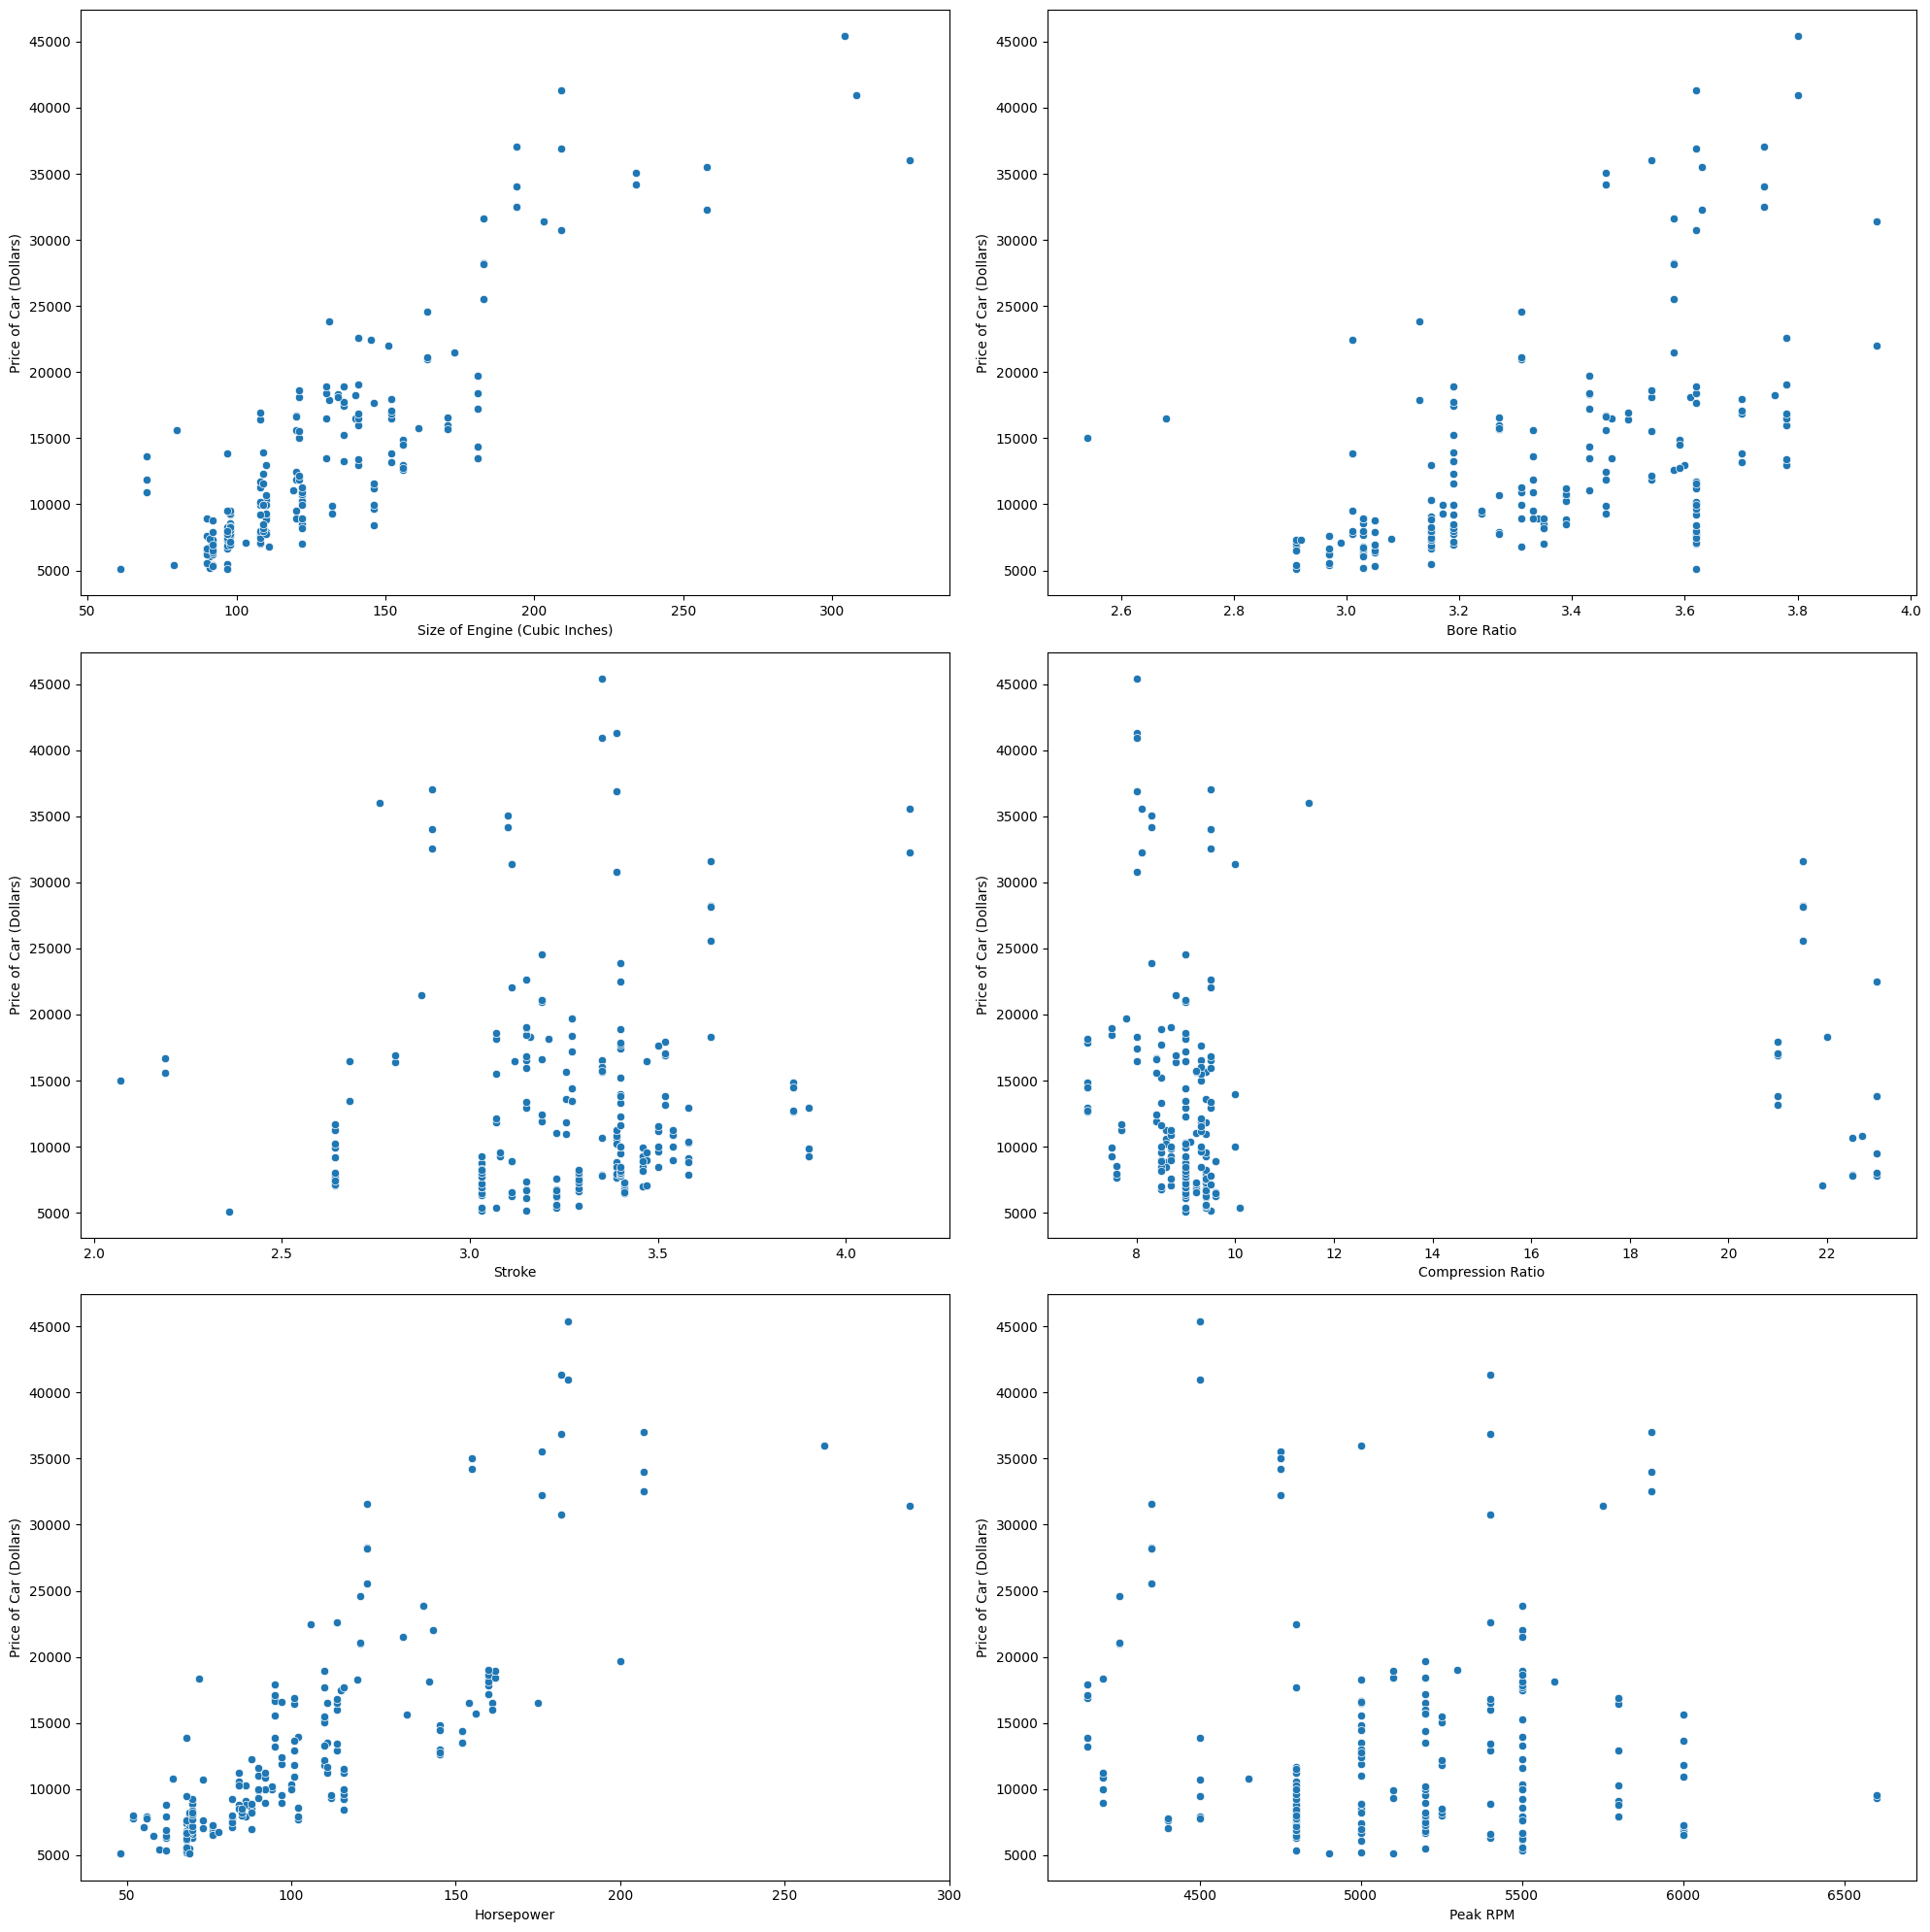

In [45]:
fig, axs = plt.subplots(3,2,figsize=(20,20))
#
plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
#
plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')
#
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')
#
plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data = df, ax = axs[1,1])
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'horsepower', y = 'price', data = df, ax = axs[2,0])
plt5.set_xlabel('Horsepower')
plt5.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'peakrpm', y = 'price', data = df, ax = axs[2,1])
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()
plt.show()

In [46]:
df['mileage'] = df['citympg']*0.55 + df['highwaympg']*0.45

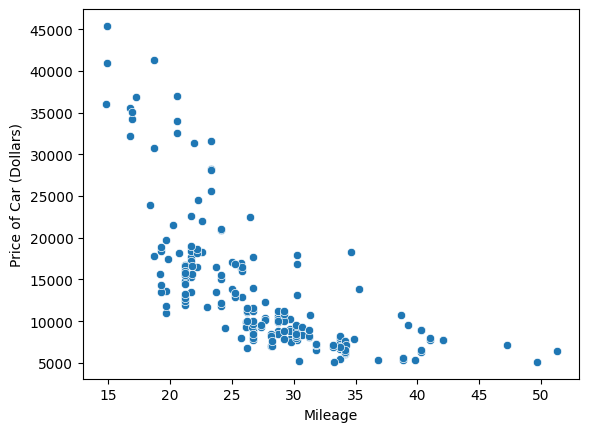

In [47]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

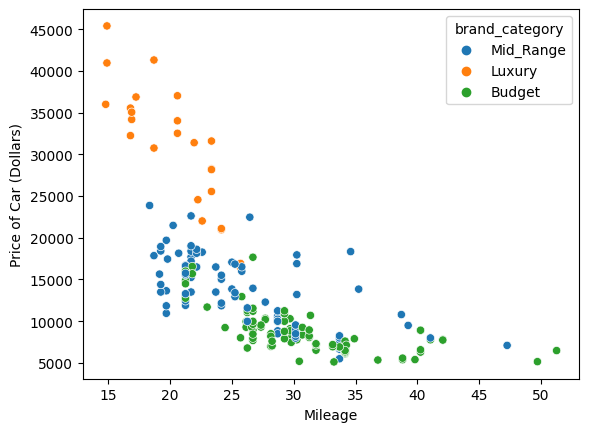

In [48]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

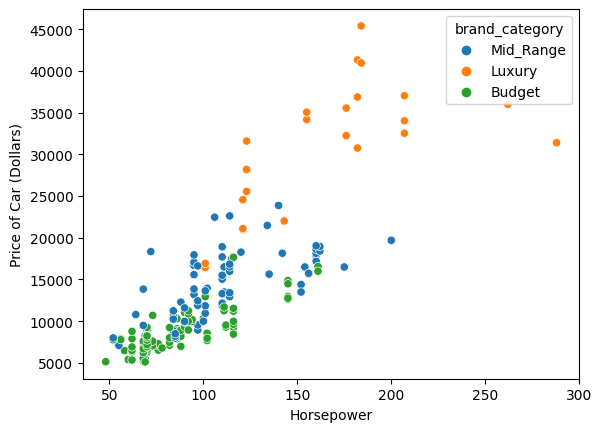

In [49]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = df)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

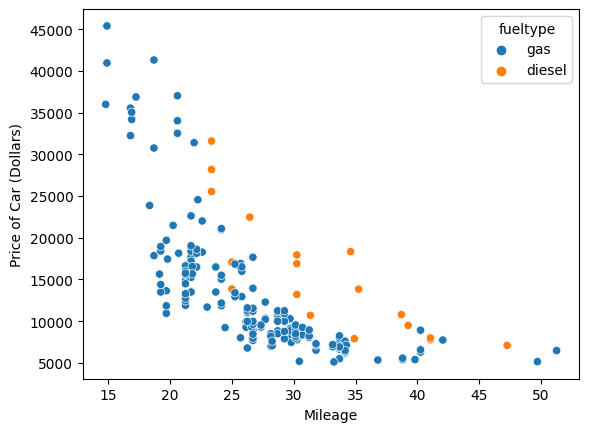

In [50]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fueltype', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

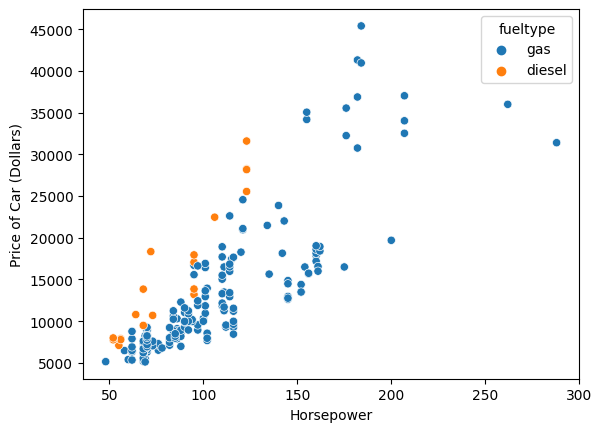

In [51]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = df)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

##**Summary Univariate and Bivriate Analysis:**
From the above Univariate and bivariate analysis we can filter out variables which does not affect price much.

The most important driver variable for prediction of price are:-


Brand Category<br>
Fuel Type<br>
Aspiration<br>
Car Body<br>
Drive Wheel<br>
Wheelbase<br>
Car Length <br>
Car Width<br>
Curb weight<br>
Engine Type<br>
Cylinder Number<br>
Engine Size<br>
Bore Ratio<br>
Horsepower<br>
Mileage<br>

##Linear Regression Model

In [52]:
auto = df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'brand_category', 'mileage']]

In [ ]:
auto.head()

##Visualising the Data

<Figure size 1500x1500 with 0 Axes>

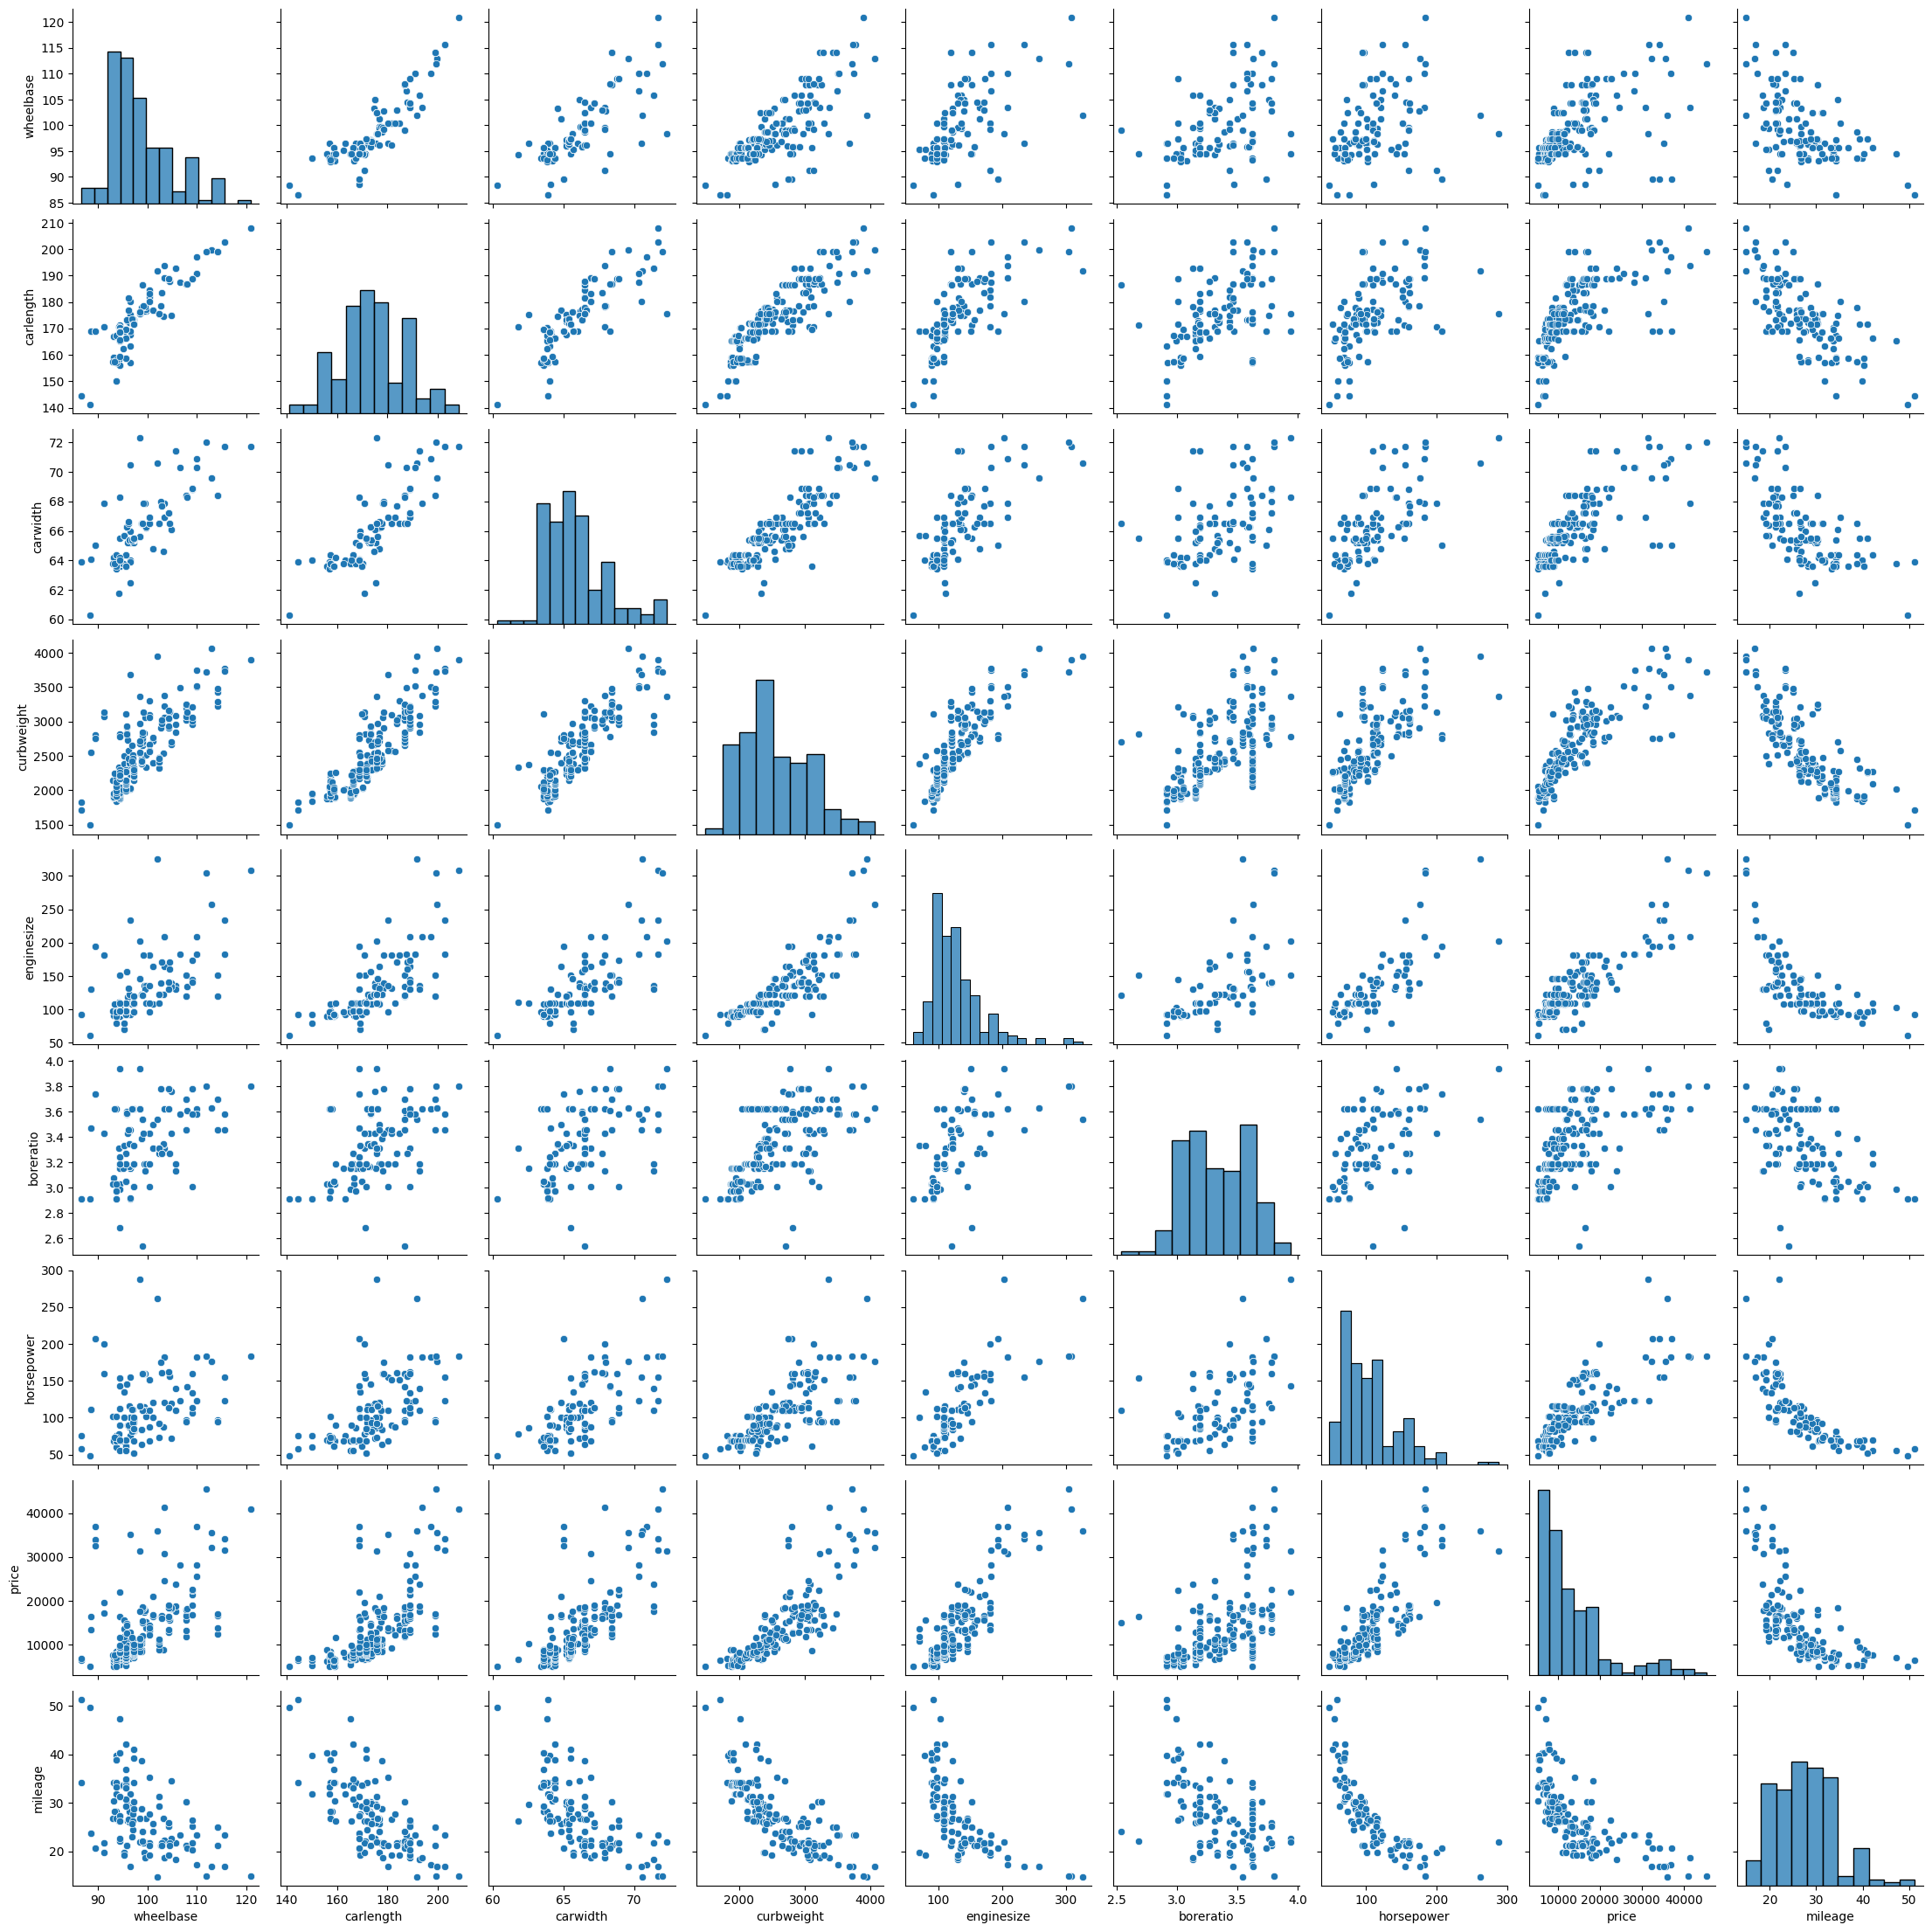

In [54]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()

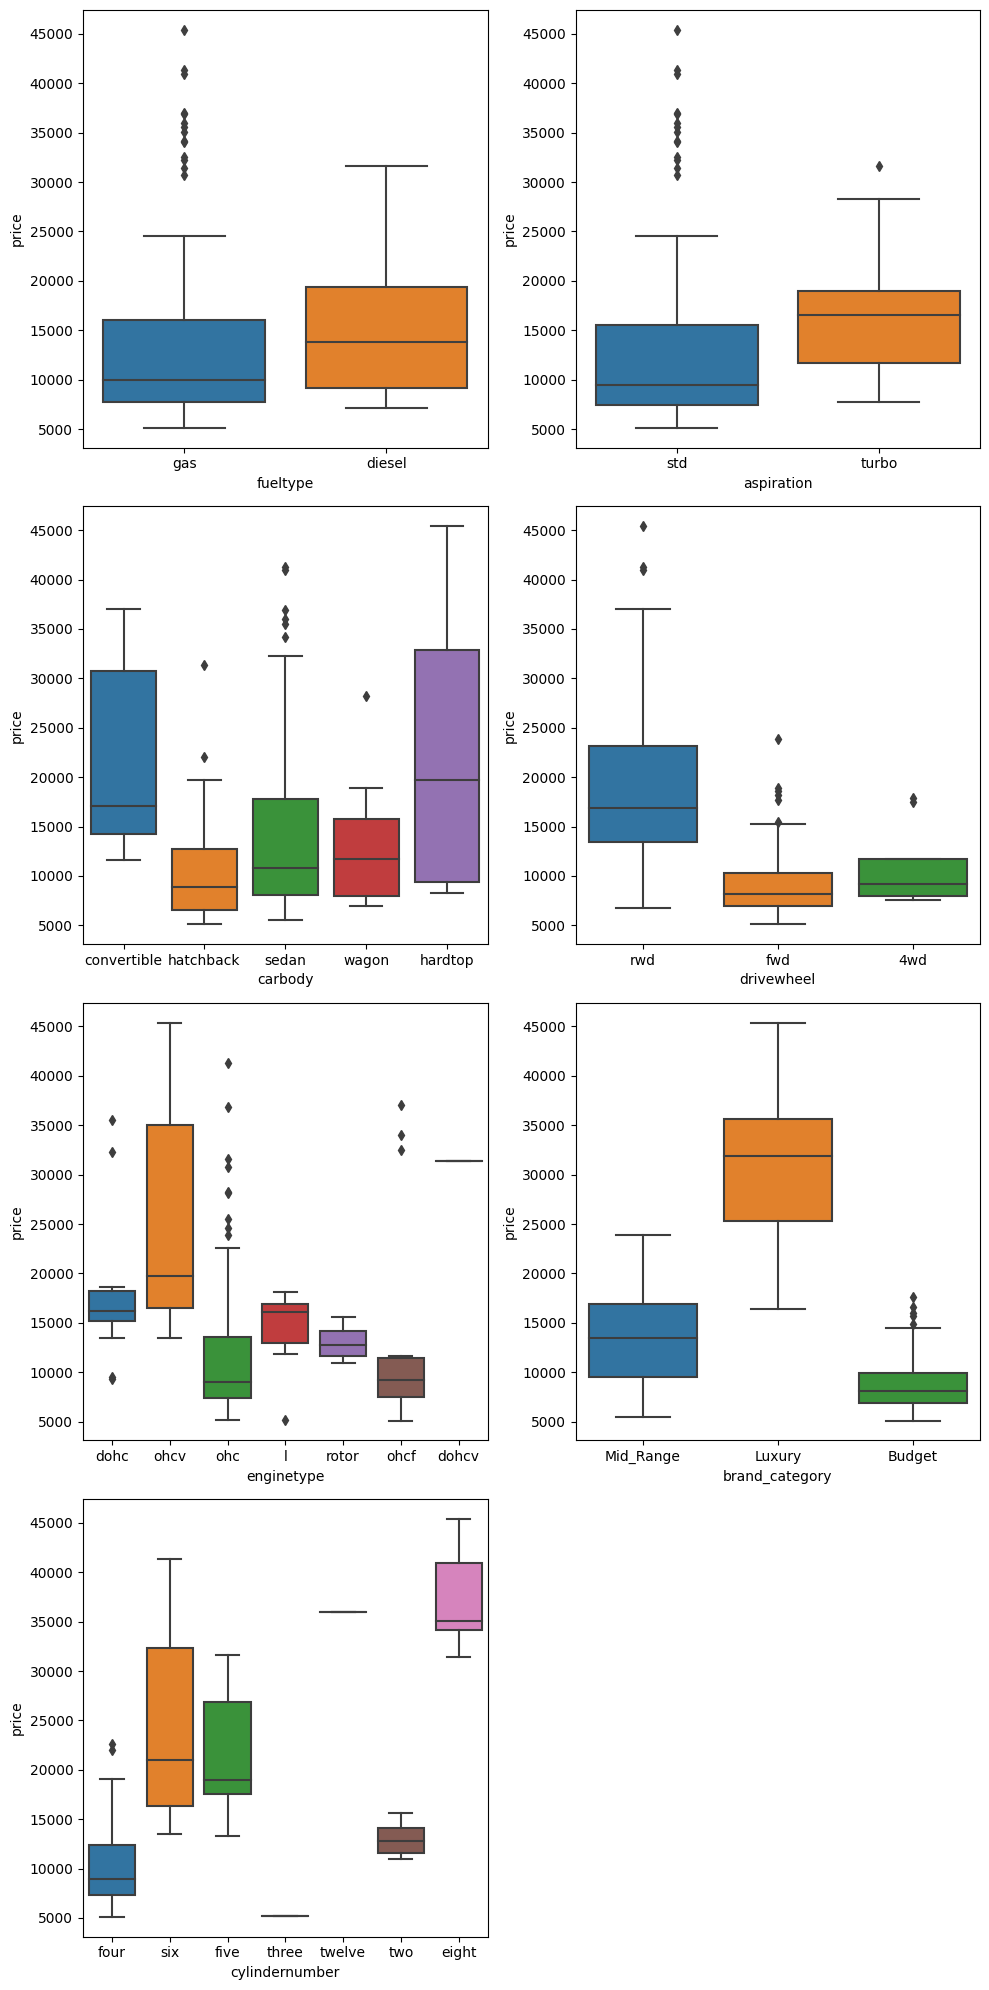

In [55]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = auto)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = auto)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = auto)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = auto)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = auto)
plt.subplot(4,2,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto)
plt.tight_layout()
plt.show()

##Data Preparation
###Dummy Variables

In [56]:
cyl_no = pd.get_dummies(auto['cylindernumber'], drop_first = True)

In [57]:
auto = pd.concat([auto, cyl_no], axis = 1)

In [58]:
brand_cat = pd.get_dummies(auto['brand_category'], drop_first = True)


In [59]:
auto = pd.concat([auto, brand_cat], axis = 1)

In [60]:
eng_typ = pd.get_dummies(auto['enginetype'], drop_first = True)

In [61]:
auto = pd.concat([auto, eng_typ], axis = 1)

In [62]:
drwh = pd.get_dummies(auto['drivewheel'], drop_first = True)

In [63]:
auto = pd.concat([auto, drwh], axis = 1)

In [64]:
carb = pd.get_dummies(auto['carbody'], drop_first = True)

In [65]:
auto = pd.concat([auto, carb], axis = 1)

In [66]:
asp = pd.get_dummies(auto['aspiration'], drop_first = True)

In [67]:
fuelt = pd.get_dummies(auto['fueltype'], drop_first = True)

In [68]:
auto = pd.concat([auto, fuelt], axis = 1)

In [69]:
auto.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber','brand_category'], axis = 1, inplace = True)

##Splitting the Data into Training and Testing sets

In [70]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

##Rescaling the Features

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()

In [73]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [74]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,five,...,ohcf,ohcv,rotor,fwd,rwd,hardtop,hatchback,sedan,wagon,gas
122,0.244828,0.426016,0.307018,0.272692,0.139623,0.230159,0.093458,0.068818,0.530864,0,...,0,0,0,1,0,0,0,1,0,1
125,0.272414,0.452033,0.701754,0.500388,0.339623,1.000000,0.443925,0.466890,0.213992,0,...,0,0,0,0,1,0,1,0,0,1
166,0.272414,0.448780,0.324561,0.314973,0.139623,0.444444,0.299065,0.122110,0.344307,0,...,0,0,0,0,1,0,1,0,0,1
1,0.068966,0.450407,0.333333,0.411171,0.260377,0.626984,0.294393,0.314446,0.244170,0,...,0,0,0,0,1,0,0,0,0,1
199,0.610345,0.775610,0.605263,0.647401,0.260377,0.746032,0.532710,0.382131,0.122085,0,...,0,0,0,0,1,0,0,0,1,1


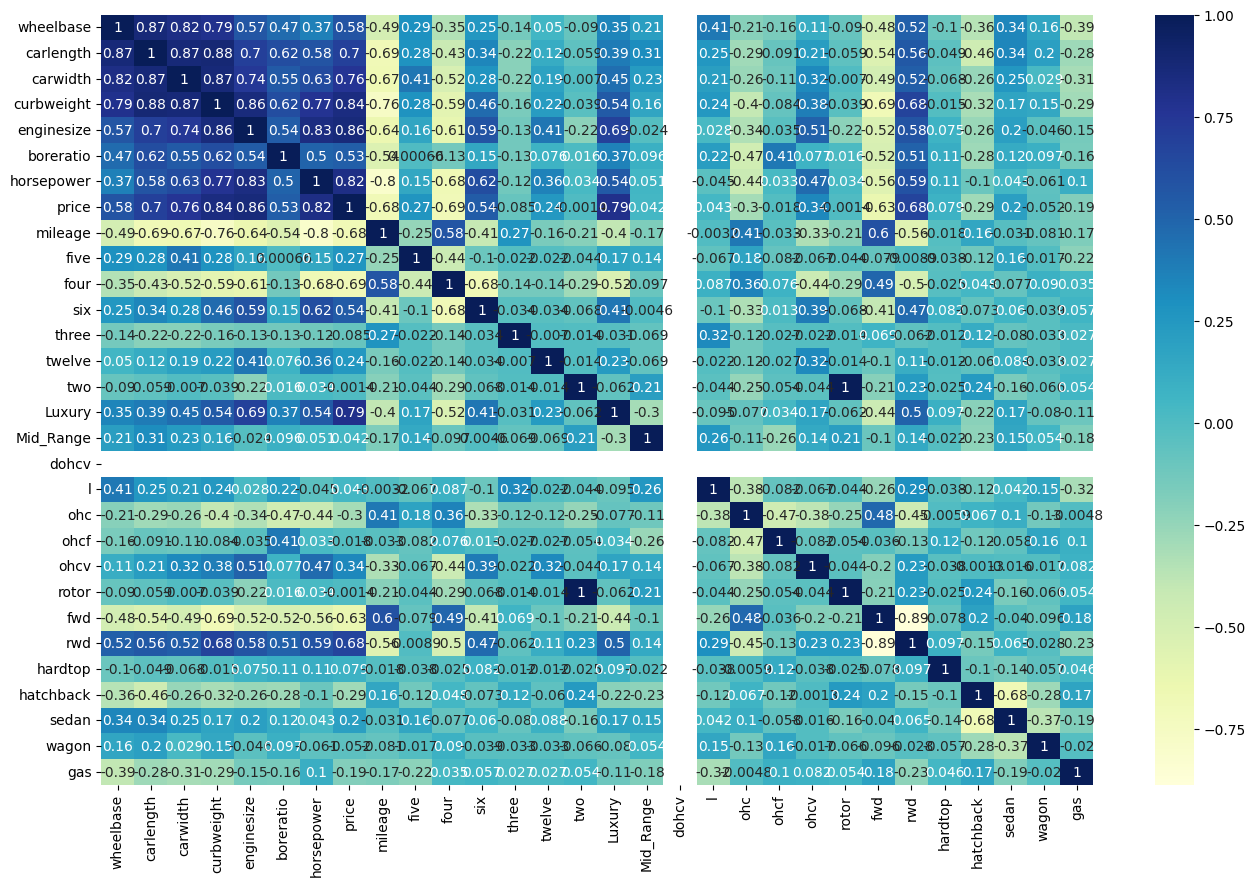

In [75]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [76]:
y_train = df_train.pop('price')
X_train = df_train

In [77]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [80]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [81]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 4),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('five', False, 7),
 ('four', False, 8),
 ('six', False, 9),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', False, 12),
 ('Luxury', True, 1),
 ('Mid_Range', False, 5),
 ('dohcv', False, 16),
 ('l', False, 15),
 ('ohc', False, 3),
 ('ohcf', False, 2),
 ('ohcv', False, 10),
 ('rotor', True, 1),
 ('fwd', False, 6),
 ('rwd', False, 14),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('gas', False, 13)]

In [82]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carwidth', 'curbweight', 'boreratio', 'horsepower',
       'mileage', 'three', 'twelve', 'Luxury', 'rotor', 'hardtop', 'hatchback',
       'sedan', 'wagon'],
      dtype='object')

In [83]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [84]:

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [85]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [86]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     136.4
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           1.05e-69
Time:                        02:45:38   Log-Likelihood:                 213.40
No. Observations:                 143   AIC:                            -396.8
Df Residuals:                     128   BIC:                            -352.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0486      0.047     -1.028      0.3

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,96.65
3,curbweight,12.15
13,sedan,11.27
12,hatchback,9.64
1,wheelbase,6.86
5,horsepower,6.68
2,carwidth,6.11
14,wagon,5.71
6,mileage,4.86
11,hardtop,1.76


In [88]:
X_train_new1 = X_train_rfe.drop(["twelve"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     142.2
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           9.50e-70
Time:                        02:45:55   Log-Likelihood:                 210.70
No. Observations:                 143   AIC:                            -393.4
Df Residuals:                     129   BIC:                            -351.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0244      0.047     -0.522      0.6

In [89]:
# Dropping hardtop as p value is high.
X_train_new2 = X_train_new1.drop(["mileage"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     149.0
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           9.07e-70
Time:                        02:45:58   Log-Likelihood:                 207.93
No. Observations:                 143   AIC:                            -389.9
Df Residuals:                     130   BIC:                            -351.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0491      0.034      1.445      0.1

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.97
3,curbweight,12.05
11,sedan,10.77
10,hatchback,9.29
1,wheelbase,6.62
2,carwidth,6.07
12,wagon,5.56
5,horsepower,4.33
9,hardtop,1.71
4,boreratio,1.70


In [92]:
# Dropping mileage as p-value is high.
X_train_new3 = X_train_new2.drop(["curbweight"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     157.3
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           7.94e-70
Time:                        02:46:30   Log-Likelihood:                 205.25
No. Observations:                 143   AIC:                            -386.5
Df Residuals:                     131   BIC:                            -351.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0606      0.034      1.777      0.0

In [93]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.89
10,sedan,9.83
9,hatchback,8.48
2,carwidth,5.47
11,wagon,5.47
1,wheelbase,4.55
4,horsepower,2.39
3,boreratio,1.66
8,hardtop,1.63
6,Luxury,1.57


##Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [94]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

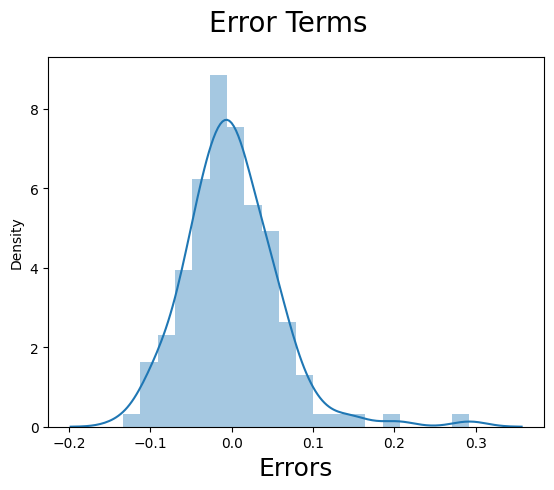

In [95]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [96]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [97]:
y_test = df_test.pop('price')
X_test = df_test

In [98]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['carwidth', 'horsepower', 'Luxury', 'hatchback']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)



Problem Statement

For example this notebook provides you the basic regression for the advertising data set.

Build a model which predicts sales based on the money spent on different platforms for marketing.

##DATASET_2

**Problem Statement**

For example this notebook provides you the basic regression for the advertising data set.

1. Build a model which predicts sales based on the money spent on different platforms for marketing.

**Data** 

1. Use the advertising dataset taken from the kaggle and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

2. In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

In [104]:
! kaggle datasets list -s advertising-dataset

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
yasserh/advertising-sales-dataset                              Advertising Sales Dataset                             2KB  2021-12-25 13:56:21           3191         33  1.0              
ashydv/advertising-dataset                                     Advertising Dataset                                   2KB  2019-03-07 06:16:58          24762        103  0.4117647        
groffo/ads16-dataset                                           ADS-16 Computational Advertising Dataset              1GB  2017-01-14 18:12:43           4247        106  0.7058824        
tohuangjia/advertising-simple-dataset                          Ad

In [105]:
! kaggle datasets download -d ashydv/advertising-dataset

  0% 0.00/1.83k [00:00<?, ?B/s]
100% 1.83k/1.83k [00:00<00:00, 910kB/s]


In [106]:
!unzip advertising-dataset.zip

Archive:  advertising-dataset.zip
  inflating: advertising.csv         


In [107]:
advertising = pd.read_csv('advertising.csv')

In [108]:
advertising.shape
advertising.head()
     

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [109]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [110]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

For suppose if you are having any null values or missing values:

We have three methods for imputing missing data.
Median
Dropping
Machine Learning Here the data with the NaN values will be checked and missing count for each column will be taken in a loop.

1.isna() is a method to check the not a number value

2.%missing will the missing values of the each columns out of 100.

####Sales (Target Variable)

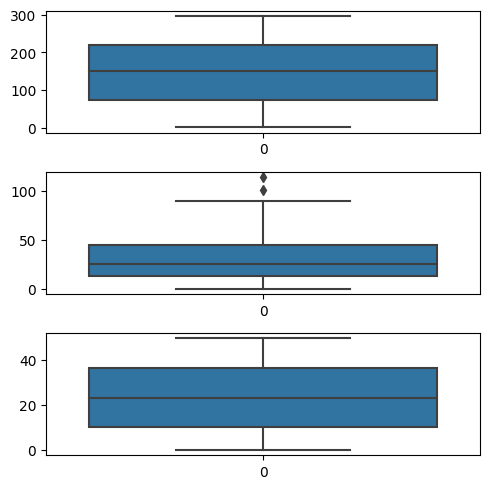

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

**There are no considerable outliers present in the data.** Check the above box plot for the reference.

##Exploratory Data Analysis

####Sales (Target Variable)

To get the box plot for the Sales

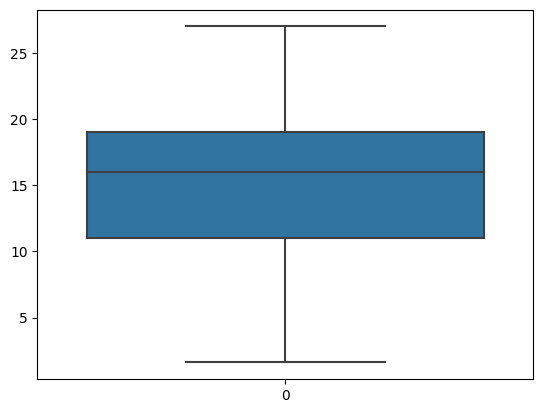

In [ ]:
sns.boxplot(advertising['Sales'])
plt.show()

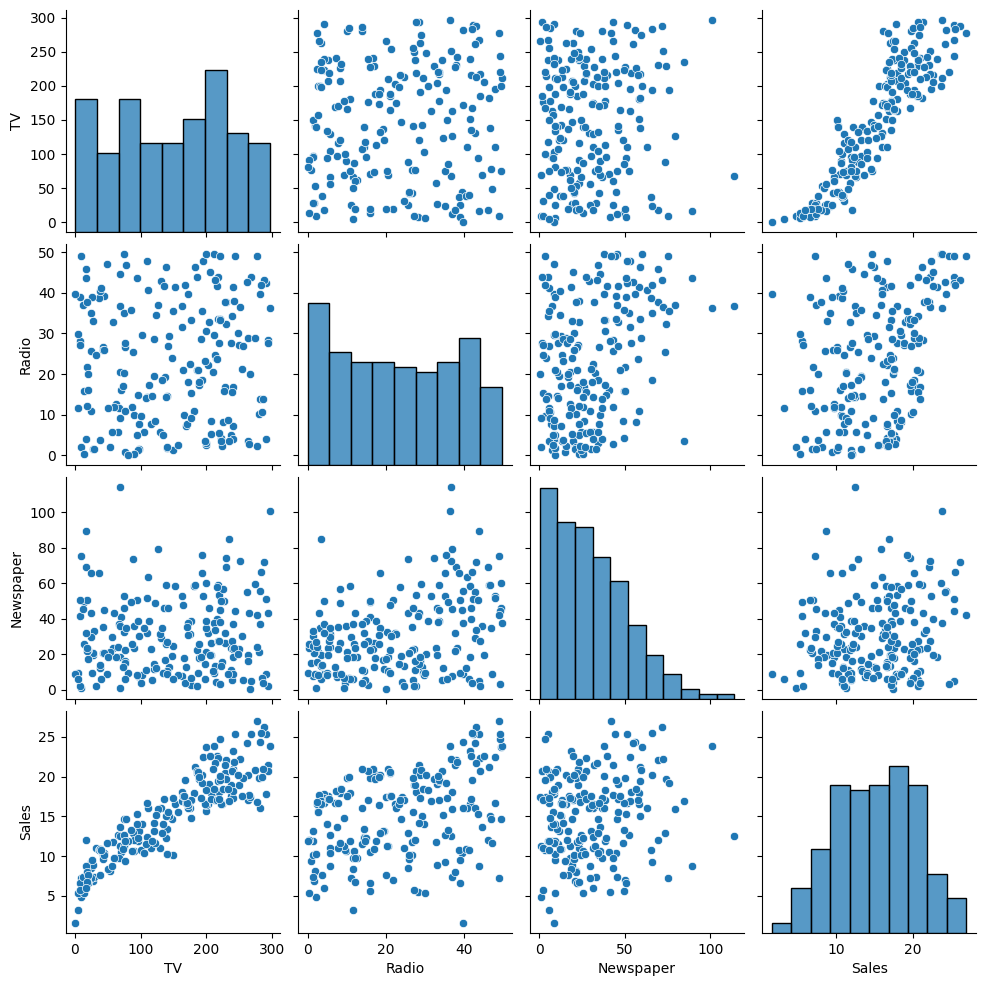

In [ ]:
p = sns.pairplot(advertising)

### Let's see how Sales are related with other variables using scatter plot.

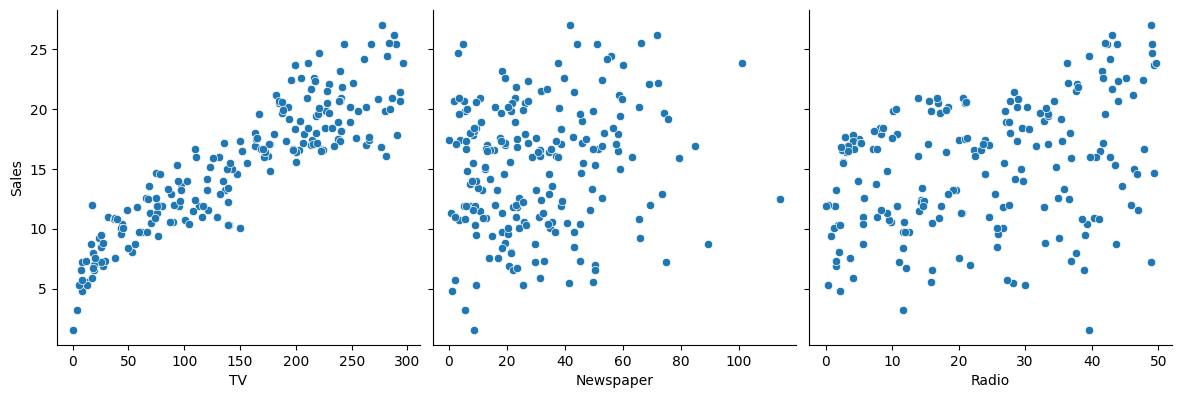

In [ ]:

sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

From the above scatter plot you can see how sales has an significant effect on the TV, Newspapers and Radio. We will dive deep into the relation from the heatmap and check which variables are having major correlation .

**Is there a relationship between advertising budget and sales?**

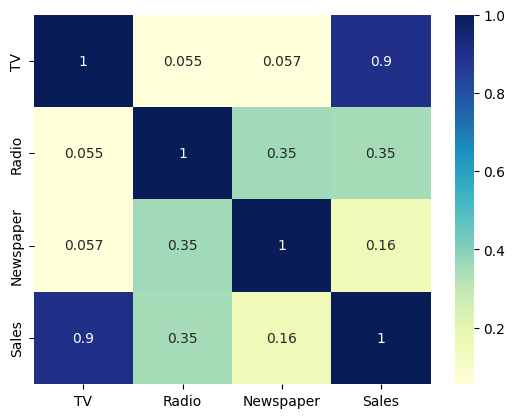

In [ ]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

**Which media contribute to sales?**

As is visible from the pairplot and the heatmap, that the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable for the further analysis.

##Model Building

####Performing Simple Linear Regression
Equation of linear regression
y=c+m1x1+m2x2+...+mnxn
 
y
  = response

c
  = intercept

m1
  = coefficient for the first feature

mnth
  = coefficient for the nth feature

In our case:


**y=c+m1×TV**
 
The  m
  values are called the model **coefficients** or model **parameters**.

In [ ]:
X = advertising['TV']
y = advertising['Sales']

**Train-Test Split**

You now need to split our variable into training and testing sets. 

You'll perform this by importing train_test_split from the sklearn.

model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [ ]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

###Building a Linear Model

In [ ]:
import statsmodels.api as sm

You first need to import the statsmodel.api library using which you'll perform the linear regression.

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

Print the parameters, i.e. the intercept and the slope of the regression line fitted

In [ ]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

Performing a summary operation lists out all the different parameters of the regression line fitted

In [ ]:

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           1.52e-52
Time:                        14:41:46   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

**Looking at some key statistics from the summary:**

The values we are concerned with are -

1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

**1. The coefficient for TV is 0.054, with a very low p value**
The coefficient is statistically significant. So the association is not purely by chance.

**2. R - squared is 0.816**
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

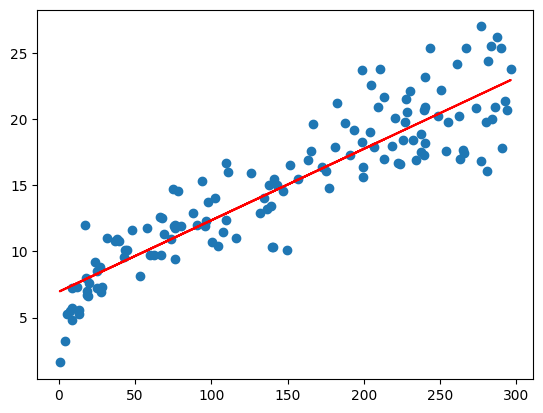

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

##Model Evaluation

**Residual analysis**

To validate assumptions of the model, and hence the reliability for inference

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

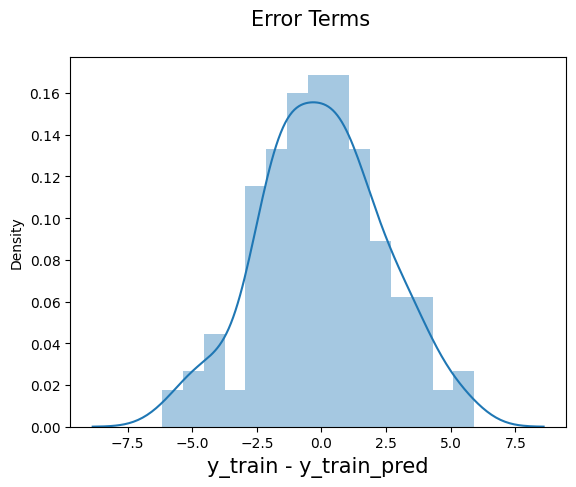

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

Looking for patterns in the residuals

**Visualizing the fit on the test set**

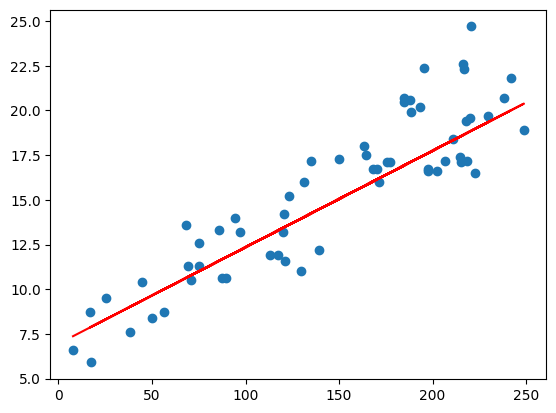

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

From the above plot we can see how well the model is able to predict the actual values of y_test

##Conclusion

**Dataset_1**

We can see that the equation of our best fitted line is:
price = 0.3957 carwidth + 0.4402 horsepower + 0.2794 luxury -0.0414 hatchback -0.0824

**Dataset_2**

The linear regression model has a positive slope (0.054), that is, there is a positive correlation between X_test and y_test.The intercept of the linear regression model is 6.948, which represents the predicted value of y_test when X_test is zero.

References:


http://r-statistics.co/Assumptions-of-Linear-Regression.html

https://www.statisticssolutions.com/assumptions-of-linear-regression/

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documnetation.

Copyright (C) <2023> Divya Myneni

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.